<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization (L1,L2 weight regularization)

In [2]:
#Load the data set
import tensorflow as tf
from sklearn.datasets import load_diabetes


In [3]:
data_diabets = load_diabetes()
print(data_diabets.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
data_diabets.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [5]:
#save input and target variables
data = data_diabets['data']
target = data_diabets['target']

In [80]:
#nomalize the target

target_normalize = (target - target.mean(axis = 0)) / target.std()

In [81]:
#slite train and test data
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target_normalize, test_size = 0.1)

In [82]:
print (train_data.shape , test_data.shape , train_target.shape , test_target.shape)


(397, 10) (45, 10) (397,) (45,)


In [83]:
#Build the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

def get_regularization_model(wight_d,rate) :
  regularization_model = Sequential ( [
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d), input_shape = (train_data.shape[1], )),
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (1) ,
  ])
  return regularization_model



In [84]:
input_shape = (train_data.shape[1], )
input_shape

(10,)

In [85]:
#ReBuild

regularization_model = get_regularization_model(0.00001,0.5)


In [86]:
regularization_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_66 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_67 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_68 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)             

In [87]:
#compile

regularization_model.compile (optimizer='adam' , loss= 'mse' , metrics= ['mae'])

In [88]:
#train with fit and save to history

history_reg = regularization_model.fit (train_data, train_target, validation_split=0.15, epochs=100 , batch_size=64, verbose=False)


In [89]:
#evaluate

regularization_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.4949 - mae: 0.6093


[0.49491772055625916, 0.6093077659606934]

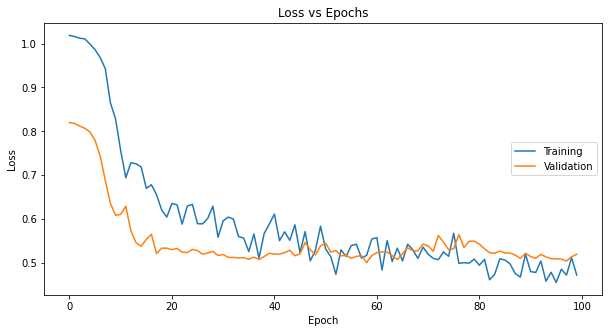

In [91]:
#plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot (history_reg.history['loss'])
plt.plot (history_reg.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'], loc ='center right')
plt.show()

# Try again 

In [94]:
def get_regularization_model_1(wight_d_1,wight_d_2, rate_1) :
  regularization_model_1 = Sequential ( [ 
                                         Dense (128, activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(wight_d_1), 
                                                bias_regularizer = tf.keras.regularizers.l2(wight_d_2) ,
                                                input_shape = (train_data.shape[1], ) ),
                                         Dropout (rate_1) ,
                                         Dense (128, activation = 'relu' , 
                                                kernel_regularizer = tf.keras.regularizers.l2(wight_d_1), 
                                                bias_regularizer = tf.keras.regularizers.l2(wight_d_2) ) ,
                                         Dropout (rate_1) ,
                                         Dense (128, activation = 'relu' , 
                                                kernel_regularizer = tf.keras.regularizers.l2(wight_d_1), 
                                                bias_regularizer = tf.keras.regularizers.l2(wight_d_2) ) ,
                                         Dropout (rate_1) ,
                                         Dense (128, activation = 'relu' , 
                                                kernel_regularizer = tf.keras.regularizers.l2(wight_d_1), 
                                                bias_regularizer = tf.keras.regularizers.l2(wight_d_2) ) ,
                                         Dropout (rate_1) ,
                                         Dense (128, activation = 'relu' , 
                                                kernel_regularizer = tf.keras.regularizers.l2(wight_d_1), 
                                                bias_regularizer = tf.keras.regularizers.l2(wight_d_2) ) ,
                                         Dropout (rate_1) ,
                                         Dense (128, activation = 'relu' , 
                                                kernel_regularizer = tf.keras.regularizers.l2(wight_d_1), 
                                                bias_regularizer = tf.keras.regularizers.l2(wight_d_2) ) ,
                                         Dropout (rate_1) ,
                                         Dense (1, activation = 'sigmoid' , name = 'output') 
  ])
  return regularization_model_1

regularization_model_1 = get_regularization_model_1(0.00001,0.005, 0.5)
print (regularization_model_1.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_72 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_73 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 128)             

In [95]:
#compile
regularization_model_1.compile ( optimizer='adam' , loss = 'mse' , metrics =['mae'])
#train and save
history_reg_1 = regularization_model_1.fit (train_data, train_target, validation_split=0.15, epochs=100, batch_size=64, verbose=False)

In [96]:
#evaluate
regularization_model_1.evaluate (test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.8104 - mae: 0.8113


[0.8103625178337097, 0.8113487958908081]

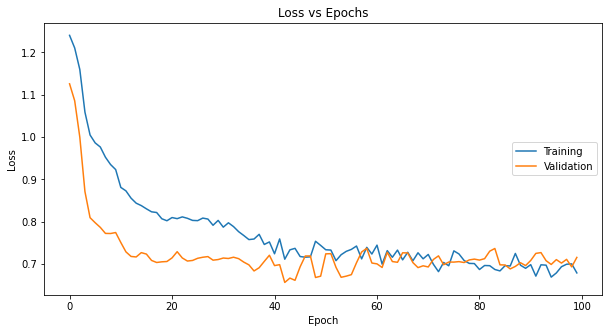

In [97]:
#plot

plt.figure(figsize=(10,5))

plt.plot (history_reg_1.history['loss'])
plt.plot (history_reg_1.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'], loc ='center right')
plt.show()